In [34]:
!pip install openpyxl
import pandas as pd
df=pd.read_excel('agricola.xlsx')
df=df.drop(['EMPRESA','PLANTIO','ID'], axis=1)
df = df.fillna(df.mean())
df.to_csv('embrapa.csv')

In [128]:
df

,REGIAO,ESPÉCIE,FASE,ADITIVO,AREA,ABA_ESP,ABB_ESP,ABC_ESP,ABD_ESP,ABE_ESP,ABF_ESP,ABG_ESP,ABH_ESP,ABI_ESP,ABL_ESP,ABM_ESP
0,SÃO CARLOS,SCS16,5d,B,99.41,85.651529,26.5440,25.40,22.956142,4446.140,29.600000,32.240000,21.770,160.366948,22.929998,12.660000
1,ASSIS,PS321832847,>5d,B,14.08,93.423077,23.9600,31.73,21.738200,181.360,28.230000,31.250000,25.200,132.243947,21.790632,12.750000
2,SÃO CARLOS,PS321832847,fr,E,20.14,85.651529,25.3700,25.51,22.956142,527.071,28.210000,31.090000,25.480,160.366948,22.929998,12.730000
3,MINAS GERAIS,PS321832847,5d,I,21.36,78.260684,27.3397,27.55,22.164190,632.200,31.284342,34.460182,24.000,164.811414,22.125389,12.696000
4,SÃO CARLOS,PS321832847,>5d,E,17.31,85.651529,26.4030,26.21,22.956142,331.977,29.680000,32.230000,26.181,160.366948,22.929998,12.640000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,RIB. PRETO,SCS19005,5d,I,16.79,64.461378,26.7500,25.01,19.738053,263.290,29.730000,32.433395,23.270,159.127400,19.718506,12.550000
7649,GOIAS,SCS19005,4d,C,52.49,73.854532,27.2400,25.56,21.426631,2516.490,30.490000,33.980000,24.100,164.483044,21.431767,12.760000
7650,MATO G. DO SUL,SCS19005,5d,B,55.76,96.842550,26.9300,25.28,24.666993,3724.710,30.030000,32.570000,22.690,160.607903,24.608273,12.530000
7651,RIB. PRETO,SCS19005,1/½,B,28.12,130.782258,28.0564,24.84,31.072154,1926.770,31.240000,33.390000,28.400,170.892612,30.873623,12.628075


In [132]:
print('Número de regiões ',len(df['REGIAO'].unique()))

Número de regiões  11


In [133]:
print('Número de espécies ',len(df['ESPÉCIE'].unique()))

Número de espécies  148


In [134]:
print('Número de fases ',len(df['FASE'].unique()))

Número de fases  9


In [135]:
print('Número de aditivos ',len(df['ADITIVO'].unique()))

Número de aditivos  6


<AxesSubplot: ylabel='Density'>

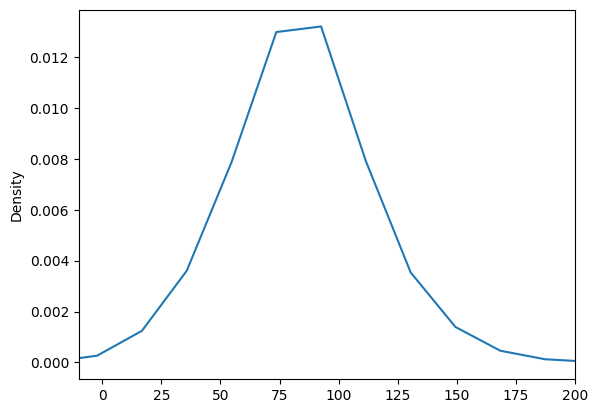

In [11]:
df['ABA_ESP'].plot(kind='kde',xlim=(-10,200))

In [13]:
df1 = df[df['ABA_ESP']<200]

In [15]:
df1['ABA_ESP'].describe()

count    7653.000000
mean       83.876802
std        24.589234
min        12.000000
25%        69.873319
50%        85.651529
75%        94.228971
max       196.330605
Name: ABA_ESP, dtype: float64

In [16]:
df1.to_csv('embrapa.csv')

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('embrapa.csv')
df=df.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1)
df.columns

In [49]:
df.columns

Index(['REGIAO', 'ESPÉCIE', 'FASE', 'ADITIVO', 'AREA', 'ABA_ESP', 'ABB_ESP',
       'ABC_ESP', 'ABD_ESP', 'ABE_ESP', 'ABF_ESP', 'ABG_ESP', 'ABH_ESP',
       'ABI_ESP', 'ABL_ESP', 'ABM_ESP'],
      dtype='object')

[0.29234088 0.31453934 0.33553153 0.35576405 0.30491475]


<AxesSubplot:title={'center':'quantidade de frutose'}, xlabel='aditivo'>

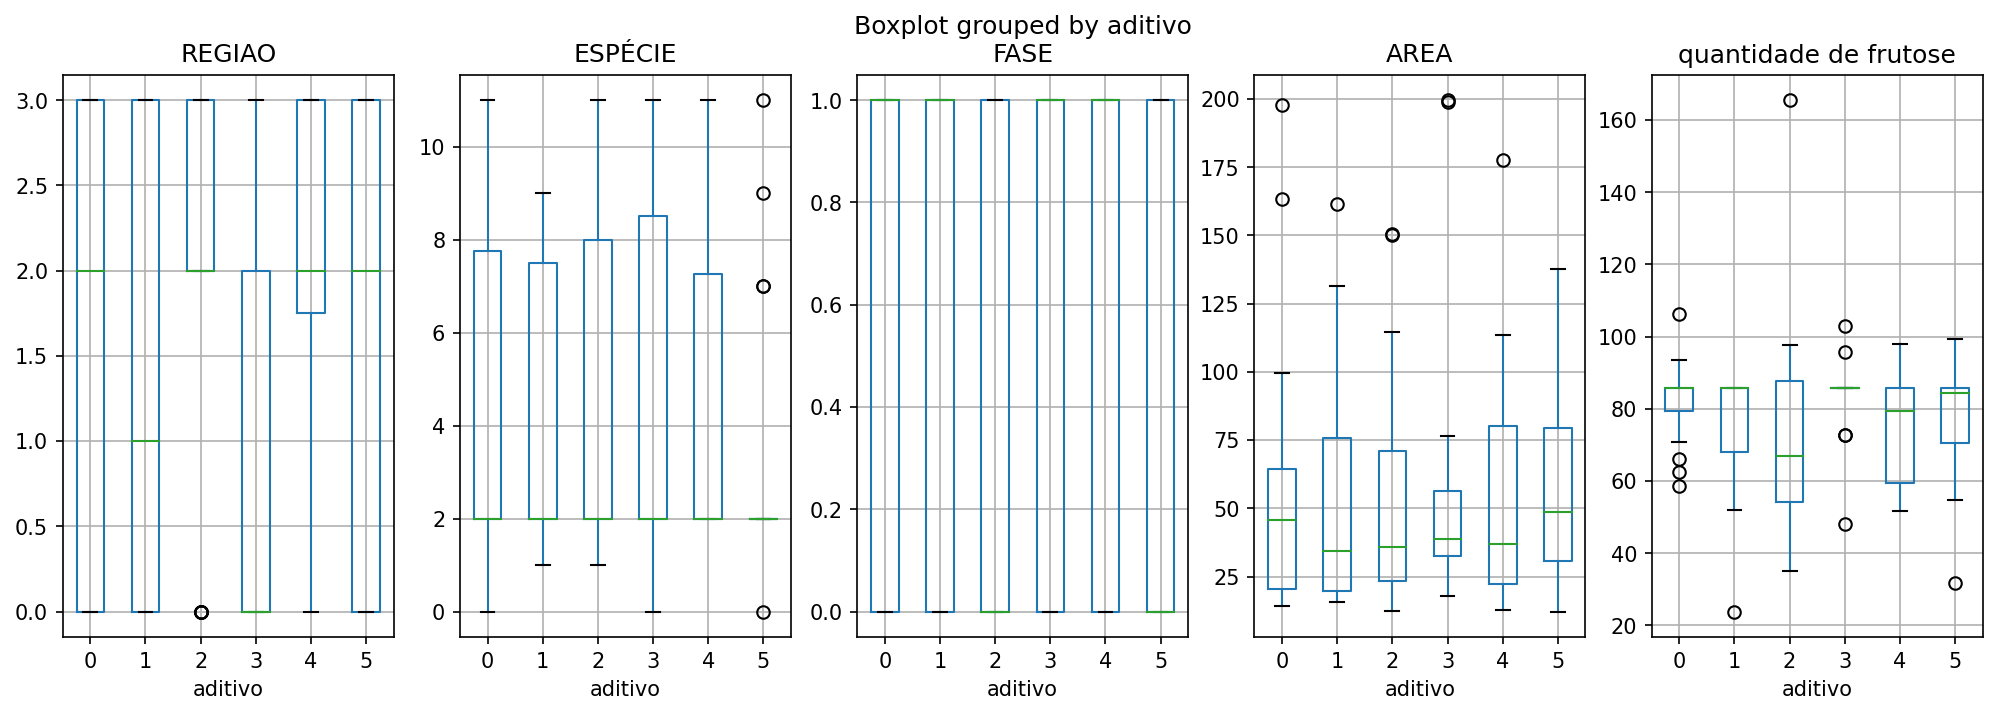

In [77]:
sets = df.copy()
sets[sets.select_dtypes(['object']).columns]= sets[sets.select_dtypes(['object']).columns].apply(lambda x: pd.factorize(x)[0])
sets= sets[sets['AREA']<200]
X = sets[['REGIAO', 'ESPÉCIE', 'FASE', 'AREA']]
W = sets['ADITIVO']
y = sets['ABA_ESP']
from cfml_tools.cfml_tools.tree import DecisionTreeCounterfactual

# usar DecisionTreeCounterfactual,árvore de regressão
dtcf = DecisionTreeCounterfactual(save_explanatory=True)
# ajustar modelo aos dados
dtcf.fit(X, W, y)
# prevendo contrafactual
counterfactuals = dtcf.predict(X)
cv_scores = dtcf.get_cross_val_scores(X, y)
print(cv_scores)
test_sample = X.iloc[[0]]
# pegar uma amostra
comparables_table = dtcf.explain(test_sample)
comparables_table = comparables_table.rename(columns={'W':'aditivo','y':'quantidade de frutose'})
fig, ax = plt.subplots(1, 5, figsize=(16, 5), dpi=150)
comparables_table.boxplot('REGIAO','aditivo', ax=ax[0])
comparables_table.boxplot('ESPÉCIE','aditivo', ax=ax[1])
comparables_table.boxplot('FASE','aditivo', ax=ax[2])
comparables_table.boxplot('AREA','aditivo', ax=ax[3])
comparables_table.boxplot('quantidade de frutose','aditivo', ax=ax[4])


In [91]:
for i in range(0,6):
    print('Aditivo ',i)
    print('Media de frutose ',comparables_table.query('aditivo==@i')['quantidade de frutose'].mean())
    print('Desvio padrao ',comparables_table.query('aditivo==@i')['quantidade de frutose'].std())

Aditivo  0
Media de frutose  82.41136537227008
Desvio padrao  10.79132444293178
Aditivo  1
Media de frutose  73.75557073094951
Desvio padrao  20.657628867804213
Aditivo  2
Media de frutose  72.23816115849499
Desvio padrao  26.712580846302746
Aditivo  3
Media de frutose  83.07053061461133
Desvio padrao  12.564356870963415
Aditivo  4
Media de frutose  73.99095185071654
Desvio padrao  14.806627796671341
Aditivo  5
Media de frutose  76.89860480786473
Desvio padrao  15.137972124959822


In [105]:
ind = sets[sets['ESPÉCIE']<=11].index
df[df.index.isin(ind)]['ESPÉCIE'].unique()

array(['SCS16', 'PS321832847', 'SCS14', 'PS321716180', 'BULL24825336',
       'BULL24785554', 'PS321841431', 'PS321801842', 'SCS115',
       'BULL24855536', 'BULL24845210', 'PS321813250'], dtype=object)

#### É possível observar que para as regiões de São Carlos(0), Assis(1), Minas Gerais(2) e Araçatuba(3),para as fases 5d(0) e >5d(1) o aditivo B(0) gerou o melhor resultado de frutose em 10 espécies, com um bom resultado de média,com valor 82.4, e menor desvio padrão de 10.7. Para outras regiões não é possível afirmar que tipo de aditivo gera melhores resultados, pois os dados existentes não nos permitem estas conclusões.As 10 espécies para as quais estas conclusões são válidas: SCS16', 'PS321832847', 'SCS14', 'PS321716180', 'BULL24825336','BULL24785554', 'PS321841431', 'PS321801842', 'SCS115','BULL24855536', 'BULL24845210', 'PS321813250'

[0.10324951 0.12427899 0.09772292 0.11237845 0.11911303]


<AxesSubplot:title={'center':'sacarose total recuperável'}, xlabel='aditivo'>

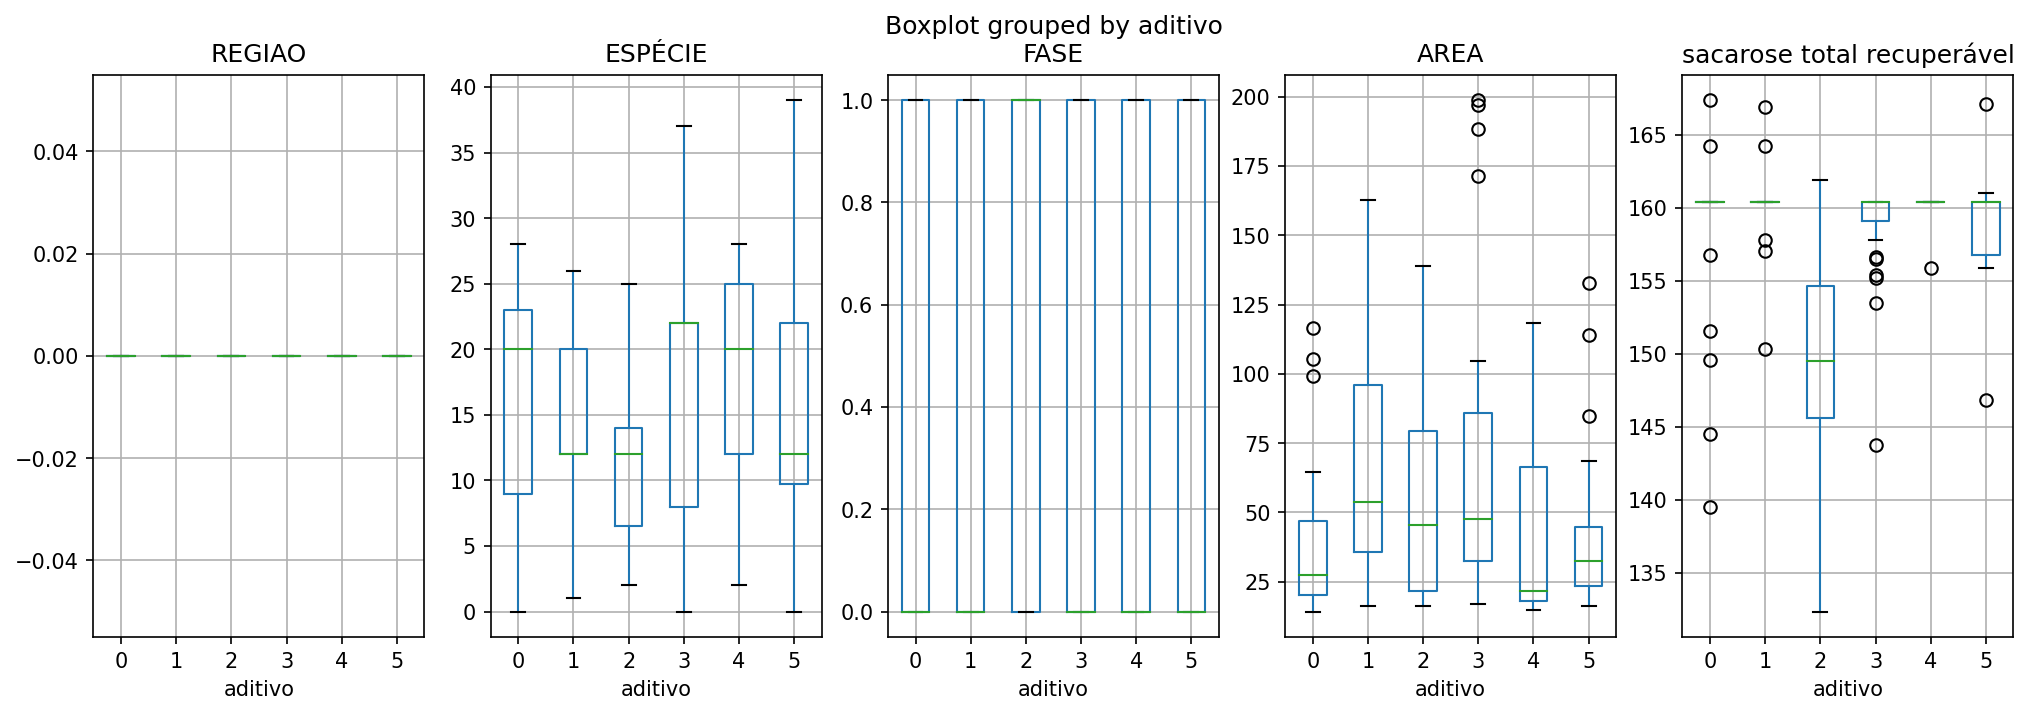

In [94]:
y = sets['ABI_ESP']
from cfml_tools.cfml_tools.tree import DecisionTreeCounterfactual

# usar DecisionTreeCounterfactual,árvore de regressão
dtcf = DecisionTreeCounterfactual(save_explanatory=True)
# ajustar modelo aos dados
dtcf.fit(X, W, y)
# prevendo contrafactual
counterfactuals = dtcf.predict(X)
cv_scores = dtcf.get_cross_val_scores(X, y)
print(cv_scores)
test_sample = X.iloc[[0]]
# pegar uma amostra
comparables_table = dtcf.explain(test_sample)
comparables_table = comparables_table.rename(columns={'W':'aditivo','y':'sacarose total recuperável'})
fig, ax = plt.subplots(1, 5, figsize=(16, 5), dpi=150)
comparables_table.boxplot('REGIAO','aditivo', ax=ax[0])
comparables_table.boxplot('ESPÉCIE','aditivo', ax=ax[1])
comparables_table.boxplot('FASE','aditivo', ax=ax[2])
comparables_table.boxplot('AREA','aditivo', ax=ax[3])
comparables_table.boxplot('sacarose total recuperável','aditivo', ax=ax[4])

In [106]:
for i in range(0,6):
    print('Aditivo ',i)
    print('Media de sacarose ',comparables_table.query('aditivo==@i')['sacarose total recuperável'].mean())
    print('Desvio padrao ',comparables_table.query('aditivo==@i')['sacarose total recuperável'].std())

Aditivo  0
Media de sacarose  158.5511438556457
Desvio padrao  5.779535995710391
Aditivo  1
Media de sacarose  160.0574514871444
Desvio padrao  3.207435512245089
Aditivo  2
Media de sacarose  149.0343616142881
Desvio padrao  9.587317692307199
Aditivo  3
Media de sacarose  158.74665282528784
Desvio padrao  3.6074116672365797
Aditivo  4
Media de sacarose  159.86866754041196
Desvio padrao  1.4948403003367428
Aditivo  5
Media de sacarose  159.0140339989646
Desvio padrao  3.6726471748512295


In [111]:
ind = sets[sets['ESPÉCIE']<=28].index
df[df.index.isin(ind)]['ESPÉCIE'].unique()

array(['SCS16', 'PS321832847', 'SCS14', 'PS321716180', 'BULL24825336',
       'BULL24785554', 'PS321841431', 'PS321801842', 'SCS115',
       'BULL24855536', 'BULL24845210', 'PS321813250', 'BULL24867515',
       'SCS12', 'SCS117', 'SCS19', 'SCS122', 'PT35963346', 'SCS114',
       'PS321801816', 'BULL24855156', 'BULL24855453', 'PS321803280',
       'SCS19005HP', 'DIVERSAS', 'BULL2492579', 'SCS120', 'AIC456911099',
       'AIC456PS321955000'], dtype=object)

#### Aqui vemos que para a região de São Carlos(0),para as fases 5d(0) e >5d(1) o aditivo D(4) gerou o melhor resultado de sacarose recuperável em 28 espécies, com um bom resultado de média,com valor 159.8, e menor desvio padrão de 1.4. Para outras regiões não é possível afirmar que tipo de aditivo gera melhores resultados, pois os dados existentes não nos permitem estas conclusões.As 28 espécies para as quais estas conclusões são válidas: 'SCS16', 'PS321832847', 'SCS14', 'PS321716180', 'BULL24825336','BULL24785554', 'PS321841431', 'PS321801842', 'SCS115','BULL24855536', 'BULL24845210', 'PS321813250', 'BULL24867515','SCS12', 'SCS117', 'SCS19', 'SCS122', 'PT35963346', 'SCS114','PS321801816', 'BULL24855156', 'BULL24855453', 'PS321803280','SCS19005HP', 'DIVERSAS', 'BULL2492579', 'SCS120', 'AIC456911099','AIC456PS321955000'

In [119]:
norm = sets[['ABA_ESP', 'ABB_ESP',
       'ABC_ESP', 'ABD_ESP', 'ABE_ESP', 'ABF_ESP', 'ABG_ESP', 'ABH_ESP',
       'ABI_ESP', 'ABL_ESP', 'ABM_ESP']]
normalized_df=(norm-norm.mean())/norm.std()
normalized_df['soma'] = normalized_df.sum(axis=1)

[0.24453014 0.26021807 0.23213861 0.24051153 0.2673326 ]


<AxesSubplot:title={'center':'soma de resultados'}, xlabel='aditivo'>

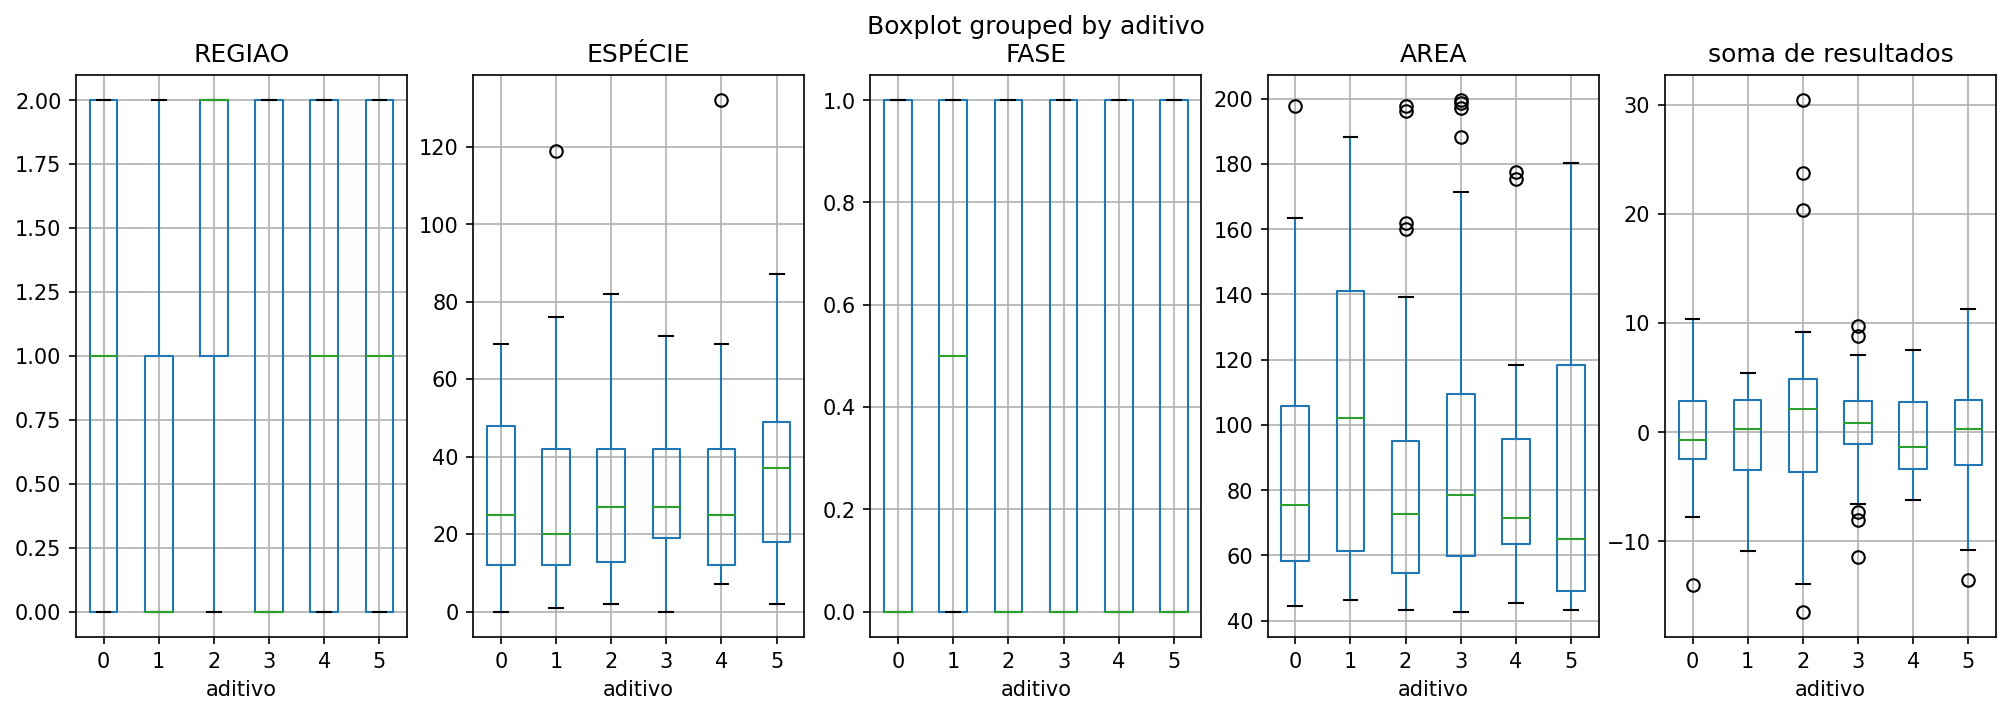

In [124]:
y = normalized_df['soma']
from cfml_tools.cfml_tools.tree import DecisionTreeCounterfactual

# usar DecisionTreeCounterfactual,árvore de regressão
dtcf = DecisionTreeCounterfactual(save_explanatory=True)
# ajustar modelo aos dados
dtcf.fit(X, W, y)
# prevendo contrafactual
counterfactuals = dtcf.predict(X)
cv_scores = dtcf.get_cross_val_scores(X, y)
print(cv_scores)
test_sample = X.iloc[[0]]
# pegar uma amostra
comparables_table = dtcf.explain(test_sample)
comparables_table = comparables_table.rename(columns={'W':'aditivo','y':'soma de resultados'})
fig, ax = plt.subplots(1, 5, figsize=(16, 5), dpi=150)
comparables_table.boxplot('REGIAO','aditivo', ax=ax[0])
comparables_table.boxplot('ESPÉCIE','aditivo', ax=ax[1])
comparables_table.boxplot('FASE','aditivo', ax=ax[2])
comparables_table.boxplot('AREA','aditivo', ax=ax[3])
comparables_table.boxplot('soma de resultados','aditivo', ax=ax[4])

In [127]:
for i in range(0,6):
    print('Aditivo ',i)
    print('Média de soma de resultados ',comparables_table.query('aditivo==@i')['soma de resultados'].mean())
    print('Desvio padrao ',comparables_table.query('aditivo==@i')['soma de resultados'].std())

Aditivo  0
Média de soma de resultados  -0.4993512025676197
Desvio padrao  4.496434325085568
Aditivo  1
Média de soma de resultados  -0.38459496333693544
Desvio padrao  4.195144537318415
Aditivo  2
Média de soma de resultados  1.4759586047449857
Desvio padrao  9.072168306496996
Aditivo  3
Média de soma de resultados  0.5355471260698661
Desvio padrao  4.353658954877105
Aditivo  4
Média de soma de resultados  -0.5404801923155114
Desvio padrao  3.830632624255964
Aditivo  5
Média de soma de resultados  -0.020817091416557458
Desvio padrao  5.583688317955517


#### Para as regiões de São Carlos(0), Assis(1), Minas Gerais(2),com as fases 5d(0) e >5d(1), nenhum aditivo gerou diferenças significativas de soma dos resultados em aproximadamente 50 espécies,como pode ser observado no último grafico boxplot,soma de resultados. O Aditivo 2 gerou maior média de 1.4, mas maior desvio padrão de 9. O aditivo 3 alcançou o melhor resultado combinado de média e desvio padrão(media 0.5 e desvio 4.3),mas mesmo assim não tem um diferença tão grande em relação aos outros aditivos.